# Log Parser Notebook
Exploratory notebook for testing out parsing the logs for workflow statistics


In [3]:
import logging
import datetime
import time

# TODO: better logs: https://www.toptal.com/python/in-depth-python-logging
def configure_logging(save_path='', log_filename='logfile', log_level=logging.INFO):
    """Log to the terminal and to file simultaneously."""
    timestamp = datetime.datetime.fromtimestamp(time.time()).strftime(
        '%Y%m%d.%H%M%S')  # datetime.now().strftime("_%Y-%m-%d_%H-%M-%S")
    logging.basicConfig(
        format="%(asctime)s — %(name)s — %(levelname)s — %(funcName)s:%(lineno)d — %(message)s", #"%(asctime)s %(levelname)s %(message)s",
        level=log_level,
        # Multiple handlers can be added to your logging configuration.
        # By default log messages are appended to the file if it exists already
        handlers=[
            logging.FileHandler(save_path+'/'+log_filename+timestamp+'.log'),
            logging.StreamHandler(),
        ])
    return save_path+'/'+log_filename+timestamp+'.log'


import os
log_path = configure_logging(os.path.join(os.path.dirname(os.getcwd()), "log/run/123456.789"))

### Fake Log Generator

In [4]:
import random

supported_feature_types = ["image_centre", "lamella_centre", "needle_tip", "lamella_edge", "landing_post"]
for i in range(100):


    RANDOM_NUM = random.randint(0, 5)

    if RANDOM_NUM > 4:
        feature_type = random.choice(supported_feature_types)
        response = random.choice([True, False])
        logging.info(f"ml_detection: {feature_type}: {response}")
    elif RANDOM_NUM > 3:
        diff = random.randint(-120, 120)
        gam = random.random() * 2.0
        logging.info(f"gamma_correction: diff: {diff:.3f}: gam: {gam:.3f} ")
    
    else:
        logging.info(f"random other log message not with the same structure {random.random():.2f}")


2021-10-26 18:01:48,998 — root — INFO — <module>:19 — random other log message not with the same structure 0.80
2021-10-26 18:01:48,999 — root — INFO — <module>:16 — gamma_correction: diff: -50.000: gam: 0.254 
2021-10-26 18:01:49,000 — root — INFO — <module>:19 — random other log message not with the same structure 0.25
2021-10-26 18:01:49,001 — root — INFO — <module>:19 — random other log message not with the same structure 0.81
2021-10-26 18:01:49,002 — root — INFO — <module>:19 — random other log message not with the same structure 0.33
2021-10-26 18:01:49,003 — root — INFO — <module>:19 — random other log message not with the same structure 0.03
2021-10-26 18:01:49,004 — root — INFO — <module>:16 — gamma_correction: diff: -80.000: gam: 1.145 
2021-10-26 18:01:49,004 — root — INFO — <module>:19 — random other log message not with the same structure 0.86
2021-10-26 18:01:49,005 — root — INFO — <module>:19 — random other log message not with the same structure 0.73
2021-10-26 18:01:4

## Log Parser

In [5]:
score_dict = dict.fromkeys(supported_feature_types, {})

for feature_type in score_dict.keys():
    score_dict[feature_type] = {"True": 0, "False": 0}

gamma_dict = {"gamma": [], "diff": []}


# add a better logging identifier rather than doing this wierd parsing...

with open(log_path) as f:
    lines = f.read().splitlines()
    for i, line in enumerate(lines):
        msg = line.split("—")[-1].strip()  # should just be the message # TODO: need to check the delimeter character...
        res = msg.split(":")[0].strip()
        
        if res == "ml_detection":
            key = msg.split(":")[1].strip()
            val = msg.split(":")[-1].strip()

            if key in score_dict.keys():
                score_dict[key][val] +=1
        if res == "gamma_correction":
            gamma_dict["diff"].append(float(msg.split(":")[2].strip()))
            gamma_dict["gamma"].append(float(msg.split(":")[4].strip()))

from pprint import pprint
pprint(score_dict)
pprint(gamma_dict)


{'image_centre': {'False': 0, 'True': 2},
 'lamella_centre': {'False': 3, 'True': 0},
 'lamella_edge': {'False': 0, 'True': 1},
 'landing_post': {'False': 2, 'True': 1},
 'needle_tip': {'False': 1, 'True': 4}}
{'diff': [-50.0,
          -80.0,
          -94.0,
          52.0,
          28.0,
          39.0,
          41.0,
          -37.0,
          68.0,
          106.0,
          110.0,
          79.0,
          -42.0,
          -69.0,
          56.0,
          -61.0,
          -28.0,
          -28.0,
          3.0,
          83.0,
          -23.0,
          5.0],
 'gamma': [0.254,
           1.145,
           1.919,
           0.873,
           1.961,
           0.734,
           0.872,
           0.409,
           0.115,
           0.625,
           1.164,
           1.918,
           1.842,
           1.353,
           1.78,
           0.91,
           1.296,
           1.269,
           0.674,
           0.474,
           2.0,
           1.842]}


## Machine Learning Evaluation

<AxesSubplot:title={'center':'Machine Learning Evaluation'}>

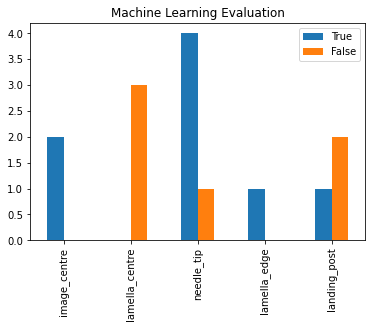

In [6]:
# eval
import pandas as pd

df = pd.DataFrame(score_dict)

# plotting
df.T.plot.bar(title="Machine Learning Evaluation")
#### TODO: change df structure?
# # feature_type #  success ###  ### count
# would make it easier to analyse... 

## Gamma Correction Evaluation
evaluate the average gamma correction


    gamma   diff
0   0.254  -50.0
1   1.145  -80.0
2   1.919  -94.0
3   0.873   52.0
4   1.961   28.0
5   0.734   39.0
6   0.872   41.0
7   0.409  -37.0
8   0.115   68.0
9   0.625  106.0
10  1.164  110.0
11  1.918   79.0
12  1.842  -42.0
13  1.353  -69.0
14  1.780   56.0
15  0.910  -61.0
16  1.296  -28.0
17  1.269  -28.0
18  0.674    3.0
19  0.474   83.0
20  2.000  -23.0
21  1.842    5.0


<AxesSubplot:title={'center':'Gamma Correction Distribution'}, ylabel='Frequency'>

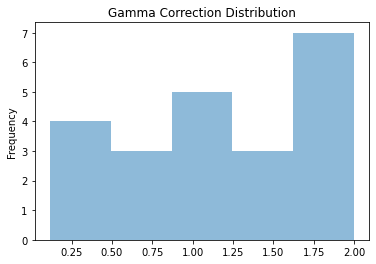

In [7]:

# pprint(gamma_dict)
df_gamma = pd.DataFrame(gamma_dict)
print(df_gamma)

df_gamma["gamma"].plot.hist(bins=5, alpha=0.5, title="Gamma Correction Distribution")